# 2019 MLB Hitting dataset cleaning and analysis

#### Datasource:
- [2019 and 2020 Hitting Data]('https://www.rotowire.com/baseball/stats.php')

#### Todo List:
- Imports
- Clean the data if need be
- Vizualize some of the data
- Start building models
- Tune Models
- Find the Top 2 best models for the data sets
- Create Easy to Read Dataframes comparing the test data and the predictions


#### Goal:

My Goal for this part of the project is to be able to predict batting average for each player with around 85-90% accuracy. I also want to take the time to explore the data and get a good understanding of it.

In [31]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Model Building Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

#Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
# Read in dataset
df = pd.read_csv('2019-batting-players.csv', index_col='Player')

In [33]:
# looking at the first 5 rows of data
df.head(5)

,Team,Pos,Age,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
Player,,,,,,,,,,,,,,,,,,,,,,
Whit Merrifield,KC,2B,31,162,681,105,206,41,10,16,74,20,10,45,126,0,4,5,0.302,0.348,0.463,0.811
Marcus Semien,OAK,SS,29,162,657,123,187,43,7,33,92,10,8,87,102,0,1,2,0.285,0.369,0.522,0.891
Rafael Devers,BOS,3B,23,156,647,129,201,54,4,32,115,8,8,48,119,1,2,4,0.311,0.361,0.555,0.916
Jonathan Villar,BAL,2B,29,162,642,111,176,33,5,24,73,40,9,61,176,2,4,4,0.274,0.339,0.453,0.792
Ozzie Albies,ATL,2B,23,160,640,102,189,43,8,24,86,15,4,54,112,0,4,4,0.295,0.352,0.500,0.852


In [34]:
df = df.drop('Team', axis=1)

In [35]:
# Describing the dataset
print(round(df.describe()))

         Age      G     AB      R      H  ...    HBP    AVG    OBP    SLG    OPS
count  694.0  694.0  694.0  694.0  694.0  ...  694.0  694.0  694.0  694.0  694.0
mean    29.0   72.0  234.0   33.0   60.0  ...    3.0    0.0    0.0    0.0    1.0
std      4.0   51.0  191.0   31.0   54.0  ...    4.0    0.0    0.0    0.0    0.0
min     21.0    1.0    1.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
25%     26.0   25.0   56.0    6.0   12.0  ...    0.0    0.0    0.0    0.0    1.0
50%     28.0   69.0  191.0   26.0   44.0  ...    2.0    0.0    0.0    0.0    1.0
75%     31.0  120.0  392.0   54.0  100.0  ...    4.0    0.0    0.0    0.0    1.0
max     46.0  162.0  681.0  135.0  206.0  ...   27.0    0.0    1.0    1.0    1.0

[8 rows x 20 columns]


In [36]:
# Getting count of missing values
missing_value_count = df.isnull().sum()

# Getting missing values for all columns
missing_value_count[:len(df.columns)]

Pos    0
Age    0
G      0
AB     0
R      0
H      0
2B     0
3B     0
HR     0
RBI    0
SB     0
CS     0
BB     0
SO     0
SH     0
SF     0
HBP    0
AVG    0
OBP    0
SLG    0
OPS    0
dtype: int64

### There are no missing values in this dataset

#### Column Labels
- Tm: Team Name
- BatAge: Average Player Age for Each Team
- R/G: Runs per Game
- G: Games played
- PA: Number of Plate Appearances
- AB: Number of At Bats
- R: Number of Runs scored
- H: Number of Hits
- 2B: Number of Doubles
- 3B: Number of Triples
- HR: Numbber of Homeruns
- RBI: Number of Runs Batted In

In [37]:
# Visualization Functions
def create_distplot(df, column):
  plt.figure(figsize=(10,5))
  plt.title(f"Displot: {column}")
  sns.distplot(df[column], hist=True, color="g", kde_kws={"shade": True})

def create_scatter(df, x, y):
  plt.figure(figsize=(10,5))
  plt.title(f"Scatter: {x} vs {y}")
  sns.scatterplot(df[x], df[y])

def create_heatmap(df):
  corr = df.corr()
  plt.figure(figsize=(16,8))
  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
  
def create_lineplot(df, x, y, hue=None, style=None):
  plt.figure(figsize=(16,8))
  plt.title(f"Lineplot: {x} vs {y}")
  sns.lineplot(x=x, y=y,
               hue = hue,
               style=style,
               data=df)

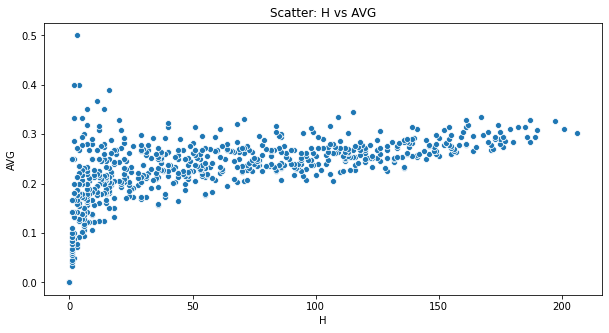

In [38]:
# Scatter for Hits vs Batting Average
create_scatter(df, 'H', 'AVG')

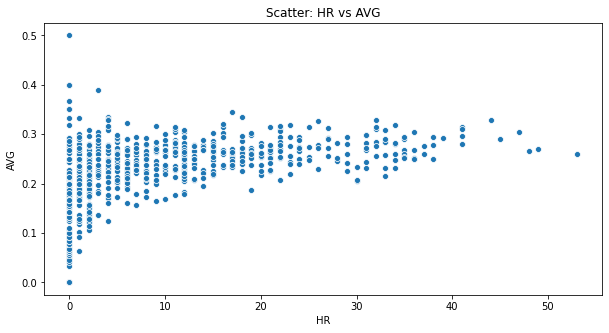

In [39]:
# Scatter for Homeruns vs Batting Average
create_scatter(df, 'HR', 'AVG')

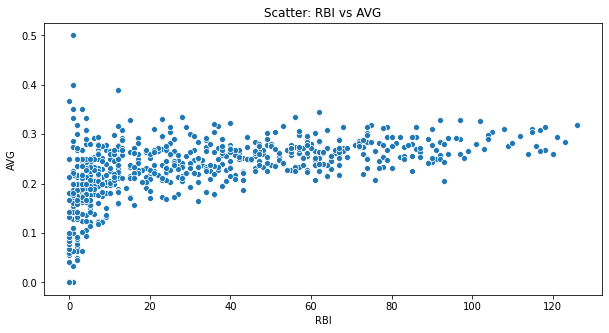

In [40]:
#Scatter for Runs Batted In vs Batting Average
create_scatter(df, 'RBI', 'AVG')

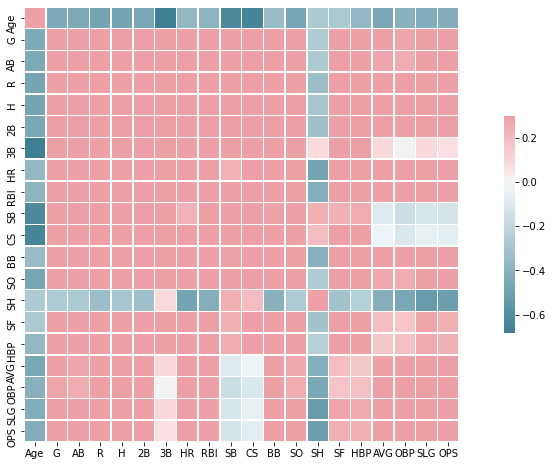

In [42]:
#Heatmap for data
create_heatmap(df.corr())

In [43]:
# Getting all cont features in one list
cont_features = df[['Age',
 'G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'SH',
 'SF',
 'HBP',
 'AVG',
 'OBP',
 'SLG',
 'OPS']]

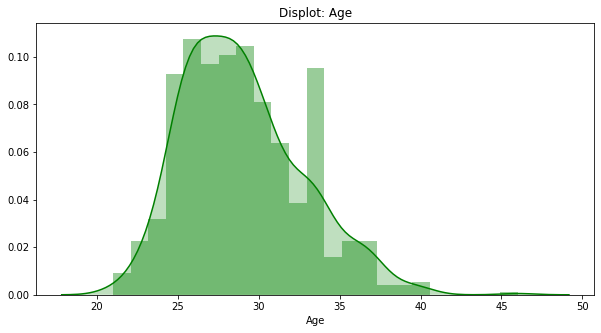

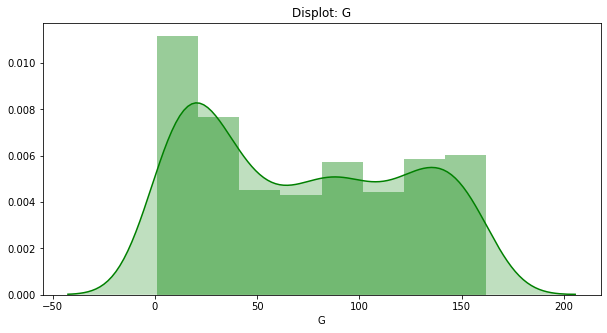

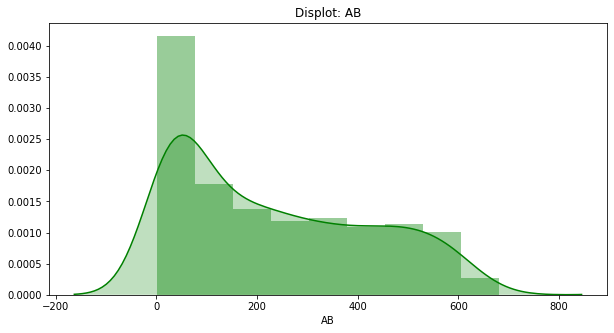

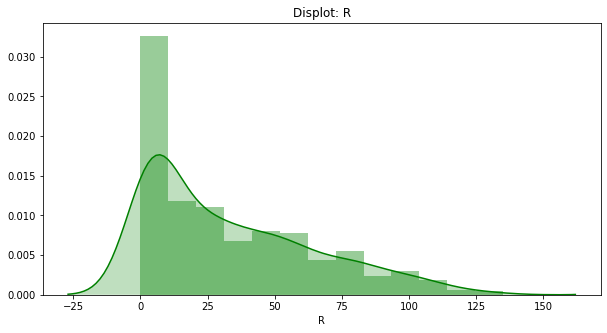

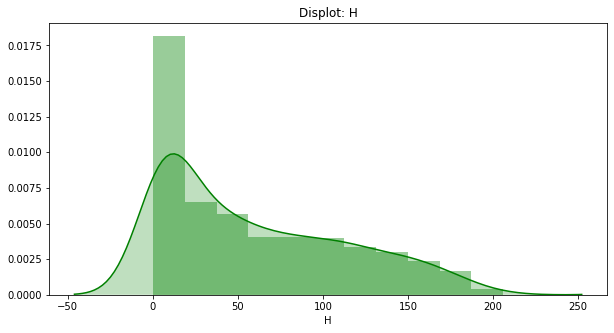

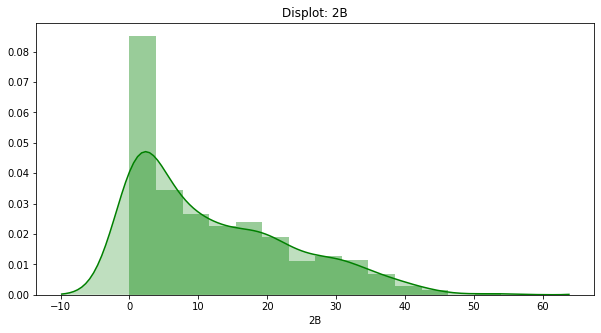

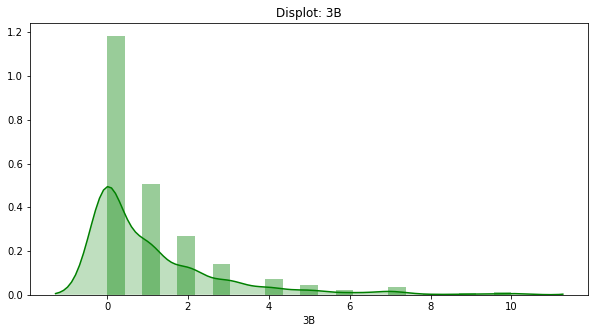

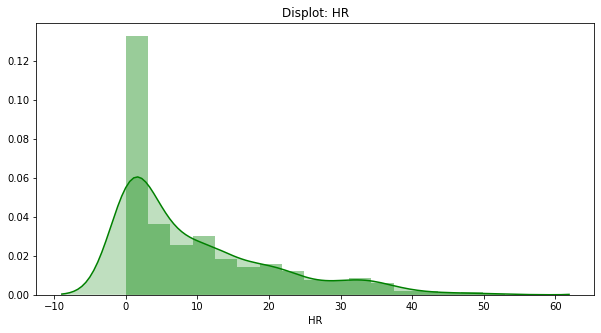

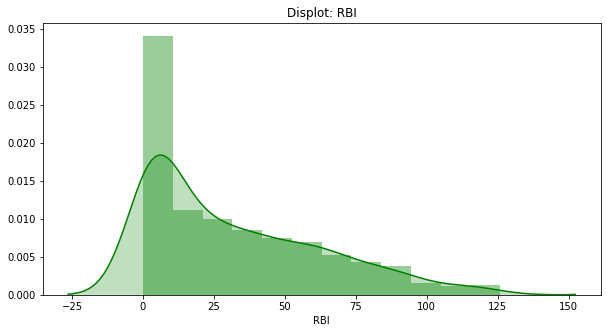

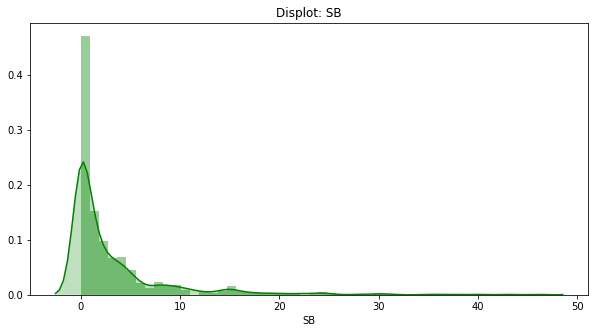

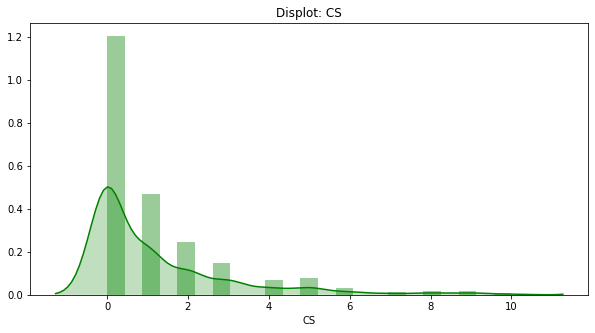

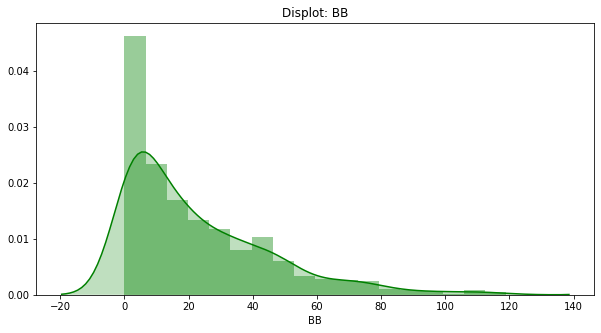

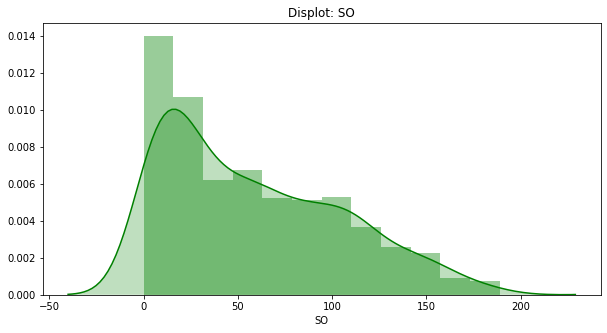

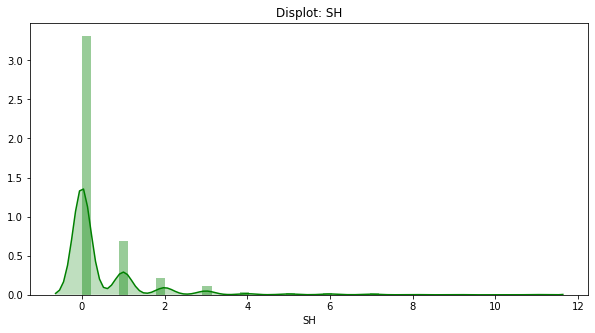

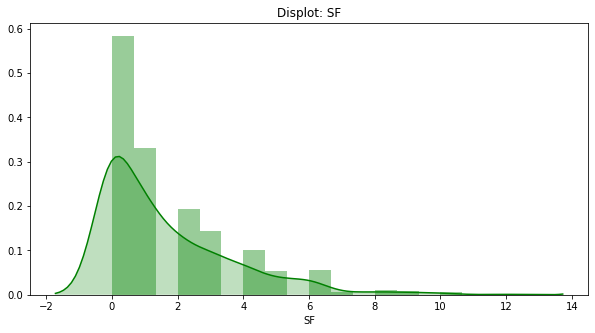

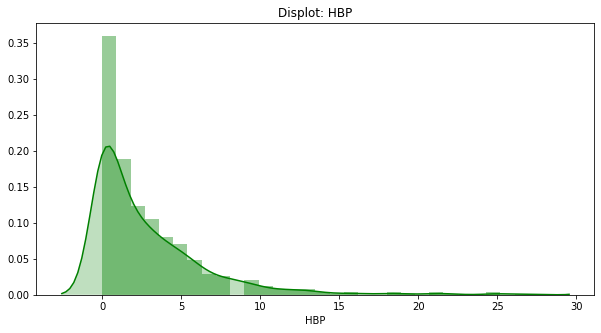

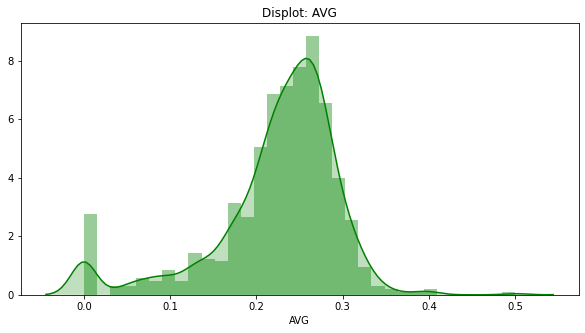

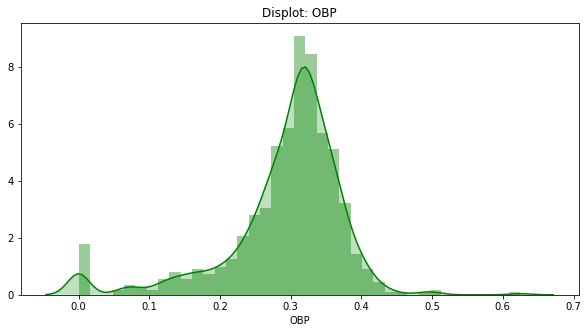

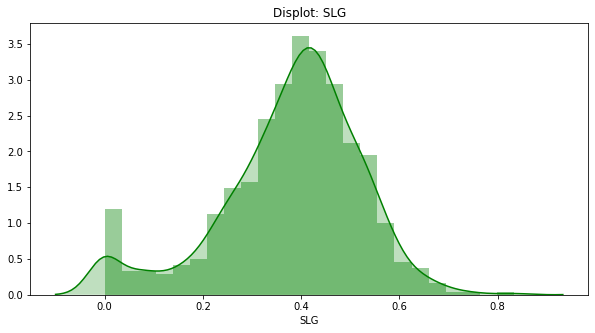

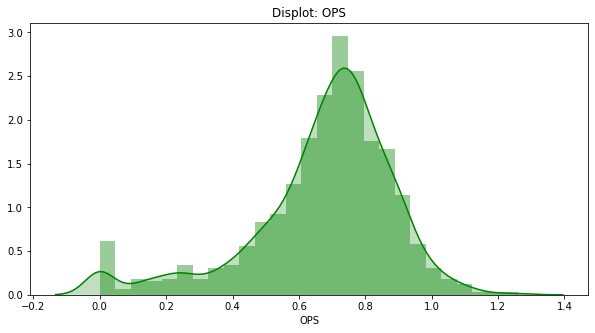

In [44]:
# making dist plots for all cont features
for feature in cont_features:
  create_distplot(df, feature)

In [45]:
df_corr = df.corr()
df_corr

,Age,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
Age,1.000000,0.038070,0.016136,-0.010009,0.006317,-0.000689,-0.143433,-0.012528,0.018767,-0.110743,-0.127840,0.040966,-0.041368,-0.046867,0.082395,0.029142,-0.059650,-0.025679,-0.054268,-0.045652
G,0.038070,1.000000,0.969954,0.915875,0.942287,0.896391,0.564664,0.806315,0.895450,0.488312,0.550636,0.837751,0.898666,0.215864,0.672713,0.607395,0.528612,0.503941,0.535616,0.546692
AB,0.016136,0.969954,1.000000,0.957838,0.986074,0.939468,0.602716,0.848267,0.937138,0.521678,0.579466,0.848547,0.904599,0.184299,0.705769,0.602817,0.521537,0.482275,0.534844,0.537869
R,-0.010009,0.915875,0.957838,1.000000,0.965904,0.933810,0.599291,0.903566,0.945905,0.540560,0.567191,0.884751,0.868967,0.133138,0.673317,0.616215,0.526657,0.511992,0.582472,0.580691
H,0.006317,0.942287,0.986074,0.965904,1.000000,0.952104,0.617674,0.847494,0.939549,0.528482,0.580298,0.825302,0.858383,0.164642,0.705616,0.586628,0.563677,0.507328,0.563493,0.566382
2B,-0.000689,0.896391,0.939468,0.933810,0.952104,1.000000,0.583682,0.806385,0.906077,0.489094,0.553691,0.797705,0.822149,0.122763,0.683754,0.565040,0.540306,0.488869,0.563757,0.559473
3B,-0.143433,0.564664,0.602716,0.599291,0.617674,0.583682,1.000000,0.415981,0.512286,0.607391,0.598862,0.450018,0.523927,0.231963,0.433295,0.345210,0.341491,0.293806,0.326447,0.328080
HR,-0.012528,0.806315,0.848267,0.903566,0.847494,0.806385,0.415981,1.000000,0.943098,0.343939,0.386752,0.840008,0.840046,-0.031770,0.603809,0.569077,0.447735,0.453961,0.617281,0.581389
RBI,0.018767,0.895450,0.937138,0.945905,0.939549,0.906077,0.512286,0.943098,1.000000,0.410716,0.462227,0.853445,0.863211,0.043620,0.719915,0.584599,0.511626,0.488010,0.602898,0.584964
SB,-0.110743,0.488312,0.521678,0.540560,0.528482,0.489094,0.607391,0.343939,0.410716,1.000000,0.736842,0.401326,0.475337,0.288812,0.322329,0.330922,0.279363,0.244480,0.233177,0.247626


In [46]:
# Getting Features that have a correlation of greater than 0.5 for model building
selected_features = []
for i in range(len(df_corr['AVG'])):
  if df_corr['AVG'].values[i] >= 0.5 and df_corr['AVG'].values[i] != 1.0:
    selected_features.append(df_corr['AVG'].index[i])

In [47]:
selected_features

['G', 'AB', 'R', 'H', '2B', 'RBI', 'OBP', 'SLG', 'OPS']

#### Model Building

- Lasso
- Linear Regression
- Ridge
- Elastic Net
- RandomForest

In [48]:
# Splitting Data into train and test
X = df[selected_features]
y = df['AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
#Function to test different Models
def test_model(model_to_test, X_test, X_train, y_test, y_train):
    f_steps = [
                ('model', model_to_test)
      ]

    f_pipe = Pipeline(steps=f_steps)
    f_pipe.fit(X_train, y_train)

    f_preds = f_pipe.predict(X_test)
    print("-" * 10 + " Model Stats " + "-" * 10)
    print('\n')
    print(f"Model Score: {f_pipe.score(X_test, y_test)}")
    print(f"MAE: {mean_absolute_error(y_test, f_preds)}")
    print(f"MSE: {mean_squared_error(y_test, f_preds)}")
    print('\n')
    print('-' * 80)
    print('\n')
    plt.figure(figsize=(10,5))
    plt.title("Model Predictions")
    plt.scatter(y_test.index[:20], y_test.values[:20])
    plt.scatter(y_test.index[:20], f_preds[:20])
    plt.xticks(rotation=90)
    plt.legend(['Test Data', 'Predictions'])

    return f_pipe

---------- Model Stats ----------


Model Score: 0.9142466422227099
MAE: 0.014921563199720414
MSE: 0.0004197175902739226


--------------------------------------------------------------------------------




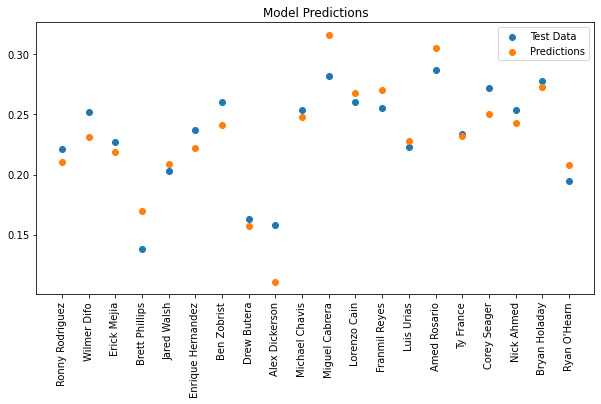

In [50]:
#LinearRegression
lr_model = test_model(LinearRegression(), X_test, X_train, y_test, y_train)

---------- Model Stats ----------


Model Score: 0.8568491920031964
MAE: 0.0184897129186603
MSE: 0.0007006479248803828


--------------------------------------------------------------------------------




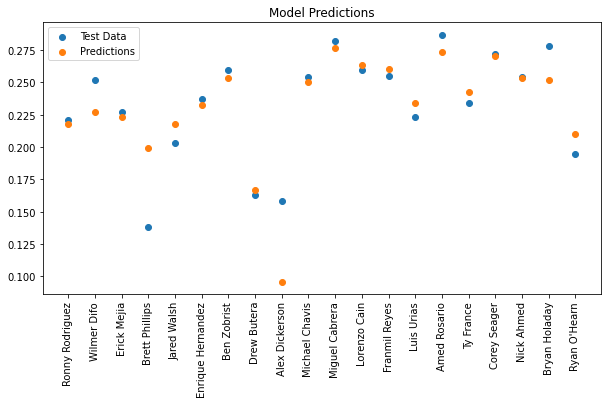

In [51]:
rf_model = test_model(RandomForestRegressor(), X_test, X_train, y_test, y_train)

---------- Model Stats ----------


Model Score: 0.28593428482551886
MAE: 0.04154816955995421
MSE: 0.0034949761623168643


--------------------------------------------------------------------------------




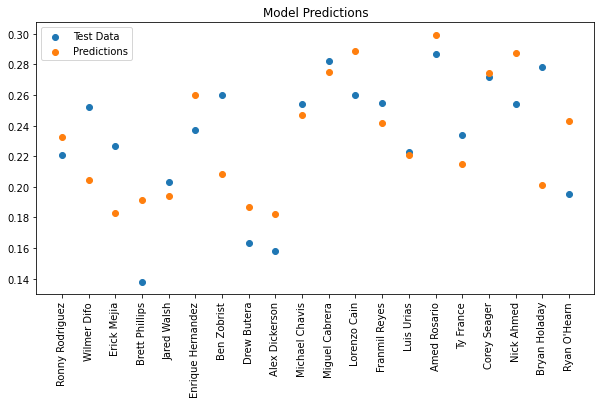

In [52]:
#Lasso Model
lasso_model = test_model(Lasso(alpha=0.3), X_test, X_train, y_test, y_train)

---------- Model Stats ----------


Model Score: 0.9157876127786728
MAE: 0.014956683466945819
MSE: 0.00041217534976934004


--------------------------------------------------------------------------------




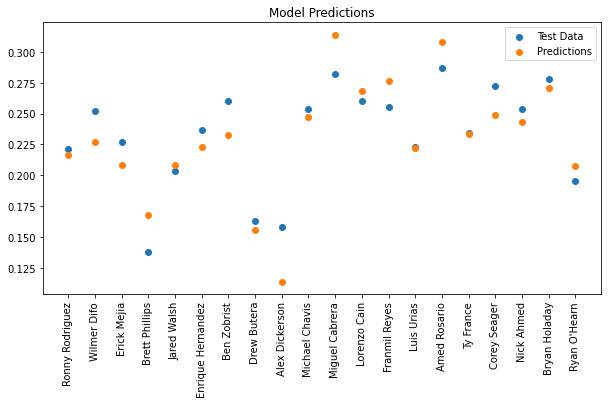

In [53]:
#Ridge Model
ridge_model = test_model(Ridge(alpha=0.7), X_test, X_train, y_test, y_train)

---------- Model Stats ----------


Model Score: 0.29948192221444914
MAE: 0.04090270153868385
MSE: 0.0034286676017406792


--------------------------------------------------------------------------------




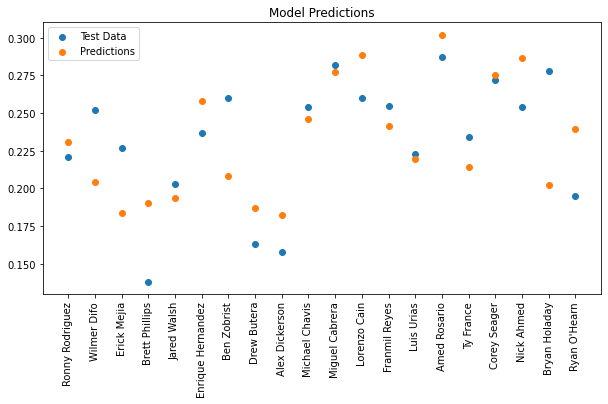

In [54]:
#ElasticNet Model
elastic_model = test_model(ElasticNet(alpha=0.5), X_test, X_train, y_test, y_train)

In [55]:
# Bring in 2020 Data
df_2020 = pd.read_csv('2020-batting-players.csv', index_col='Player')

In [56]:
#Split out data into X and y
X_2020 = df_2020[selected_features]
y_2020 = df_2020['AVG']

In [57]:
# Make predictions
y_preds = lr_model.predict(X_2020)

In [58]:
# Score the Model
lr_model.score(X_2020, y_2020)

0.8591038571310913

In [59]:
def score_new_dataset(model, X, y):
  # Make predictions
  f_preds = model.predict(X)

  # Score the Model
  f_score = model.score(X, y)

  #Print out findings
  print("Model Metrics")
  print("-" * 50)
  print('\n')
  print(f"Model Score: {f_score}")
  print(f"MAE: {mean_absolute_error(y, f_preds)}")
  print(f"MSE: {mean_squared_error(y, y_preds)}")

  # Graph Predictions
  print('\n')
  print('-' * 80)
  print('\n')
  plt.figure(figsize=(10,5))
  plt.title("First 10 Model Predictions")
  plt.scatter(y.index[:10], y.values[:10])
  plt.scatter(y.index[:10], f_preds[:10])
  plt.xticks(rotation=45)
  plt.legend(['Test Data', 'Predictions'])

  #Return predictions
  return f_preds



Model Metrics
--------------------------------------------------


Model Score: 0.8591038571310913
MAE: 0.0309224051433907
MSE: 0.0019860060271015257


--------------------------------------------------------------------------------




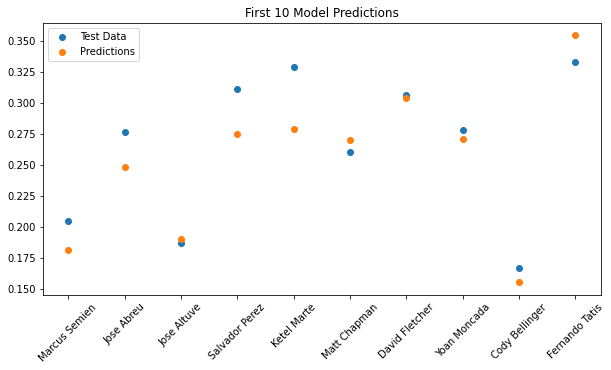

In [60]:
#LinearRegression Scoring on 2020 Data
lr_preds = score_new_dataset(lr_model, X_2020, y_2020)

Model Metrics
--------------------------------------------------


Model Score: 0.7176520848355886
MAE: 0.03453416842105264
MSE: 0.0019860060271015257


--------------------------------------------------------------------------------




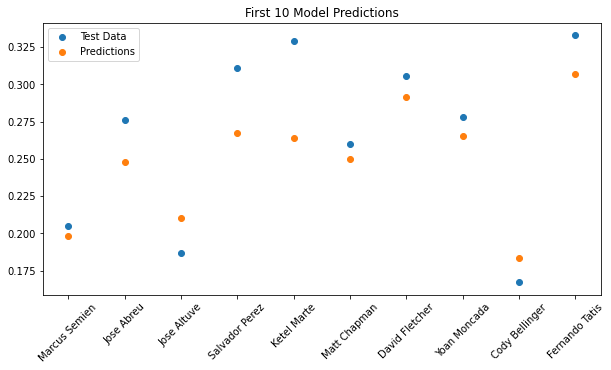

In [61]:
#RandomForest Scoring on 2020 Data
rf_preds = score_new_dataset(rf_model, X_2020, y_2020)

Model Metrics
--------------------------------------------------


Model Score: 0.8471542323360227
MAE: 0.03183563486862509
MSE: 0.0019860060271015257


--------------------------------------------------------------------------------




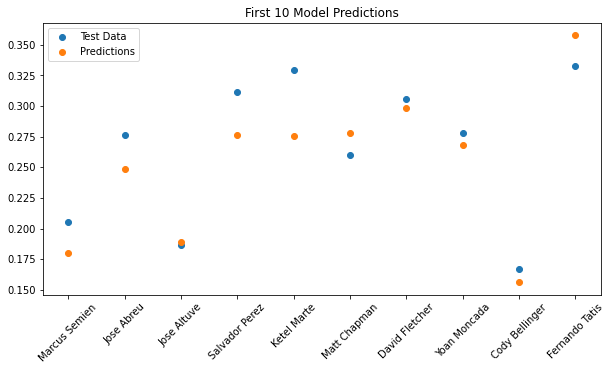

In [62]:
#RidgeRegression Scoring on 2020 Data
ridge_preds = score_new_dataset(ridge_model, X_2020, y_2020)

Model Metrics
--------------------------------------------------


Model Score: -0.07074355203150051
MAE: 0.08589404710275088
MSE: 0.0019860060271015257


--------------------------------------------------------------------------------




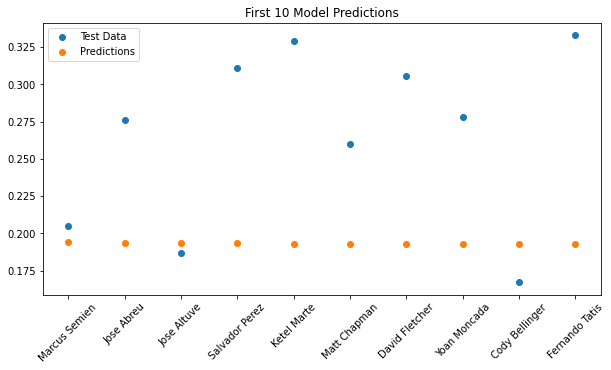

In [63]:
#LassoRegression Scoring on 2020 Data
lasso_preds = score_new_dataset(lasso_model, X_2020, y_2020)

Model Metrics
--------------------------------------------------


Model Score: -0.06438379288267937
MAE: 0.08553582011848636
MSE: 0.0019860060271015257


--------------------------------------------------------------------------------




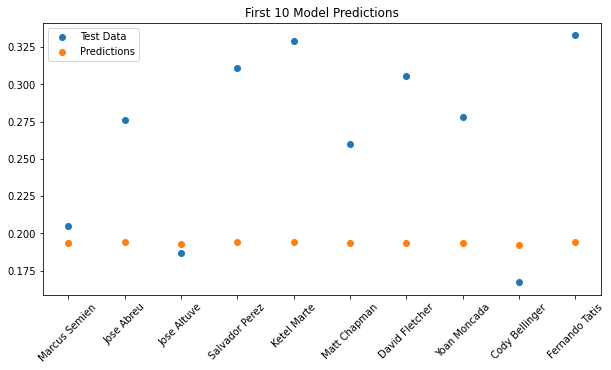

In [64]:
#ElasticNetRegression Scoring on 2020 Data
elastic_preds = score_new_dataset(elastic_model, X_2020, y_2020)

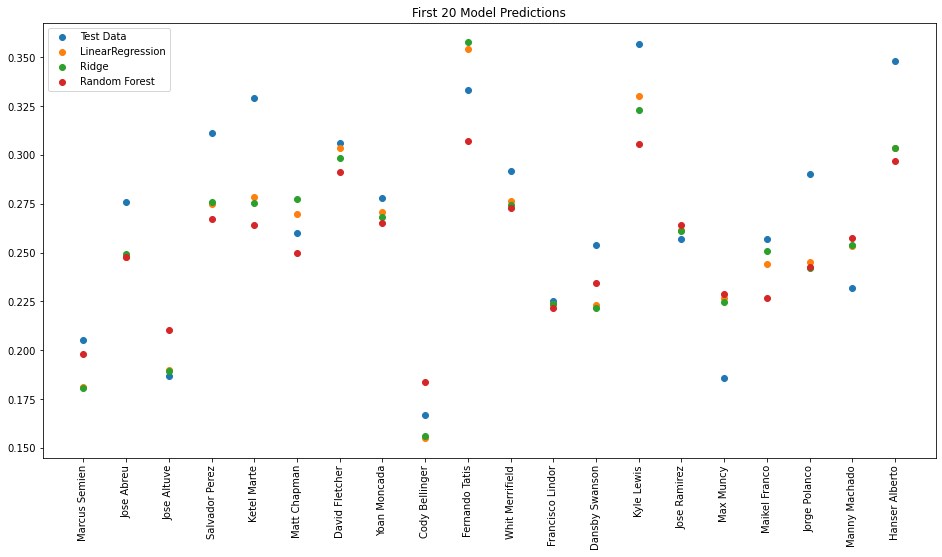

In [65]:
# Comparing All Models Top 20 Predictions
plt.figure(figsize=(16,8))
plt.title("First 20 Model Predictions")
plt.scatter(y_2020.index[:20], y_2020.values[:20])
plt.scatter(y_2020.index[:20], lr_preds[:20])
plt.scatter(y_2020.index[:20], ridge_preds[:20])
plt.scatter(y_2020.index[:20], rf_preds[:20])
plt.xticks(rotation=90)
plt.legend(['Test Data', 'LinearRegression', 'Ridge', 'Random Forest'], loc='upper left')

In [66]:
# LinearRegression Predictions
lr_predictions_df = pd.DataFrame({'Test Data': y_2020, 'LR Predictions':lr_preds})

In [67]:
# Lets see the lr_predictions_df 
lr_predictions_df.head()

,Test Data,LR Predictions
Player,,
Marcus Semien,0.205,0.181404
Jose Abreu,0.276,0.247863
Jose Altuve,0.187,0.190075
Salvador Perez,0.311,0.274931
Ketel Marte,0.329,0.278600


In [68]:
# RidgeRegression Predictions
ridge_predictions_df = pd.DataFrame({'Test Data': y_2020, 'Ridge Predictions':ridge_preds})

In [69]:
# Lets see the ridge_regression_df
ridge_predictions_df.head()

,Test Data,Ridge Predictions
Player,,
Marcus Semien,0.205,0.180416
Jose Abreu,0.276,0.249022
Jose Altuve,0.187,0.189498
Salvador Perez,0.311,0.276014
Ketel Marte,0.329,0.275351


In [70]:
# Exporting Model for later use
import pickle

filename_ridge = 'ridge_hitting_model.sav'
pickle.dump(ridge_model, open(filename_ridge, 'wb'))

filename_lr = 'lr_hitting_model.sav'
pickle.dump(lr_model, open(filename_lr, 'wb'))

---

# Pitching Analysis and Model Building

We will examine a model to predict whether or not a team has good pitchers - predicting the results of games based on W (Wins Earned). To accomplish this, we will compare 3 models.

# Model building:

Linear Regression
Decision Tree
Random Forest
Each model will be evaluated based on R2 score


# Why use R2 score?

R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.

R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100% where 100% means that all movements of a dependent variable are completely explained by movements in the independent variable(s) you are interested in.


### To Do List:
- Imports
- Clean the data if need be
- Visualize the data and relationships
- Start building models
- Fine tune the models
- Find the best models for the datasets
- Compare the test data and the predictions

In [3]:
#Read-in 2019 Pitching Data
df_pitch = pd.read_csv('./mlb-pitching-2019.csv', index_col='Player')
df_pitch.head()

,Team,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
Player,,,,,,,,,,,,,,,,,,,
Justin Verlander,HOU,37,34,34,2,1,223.0,137,64,300,42,36,21,6,0,0,0,2.58,0.80
Shane Bieber,CLE,25,34,33,3,2,214.1,186,78,259,40,31,15,8,0,0,0,3.28,1.05
Gerrit Cole,HOU,29,33,33,0,0,212.1,142,59,326,48,29,20,5,0,0,0,2.50,0.89
Stephen Strasburg,WAS,32,33,33,0,0,209.0,161,77,251,56,24,18,6,0,0,0,3.32,1.04
Mike Minor,TEX,32,32,32,2,1,208.1,190,83,200,68,30,14,10,0,0,0,3.59,1.24


In [4]:
#Describe Data
df_pitch.describe()

,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,29.049312,24.470183,5.571101,0.051606,0.029817,49.449541,48.061927,24.824541,49.074541,18.172018,7.733945,2.785550,2.784404,1.352064,0.787844,2.815367,5.901456,1.568979
std,3.517527,19.554018,9.612563,0.280801,0.189339,49.913335,47.576281,23.209626,51.865699,16.011125,7.812989,3.696726,3.237884,5.039786,1.519015,5.455095,7.724401,1.072112
min,20.000000,1.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,9.000000,0.000000,0.000000,0.000000,13.000000,14.000000,8.000000,11.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.647500,1.220000
50%,29.000000,20.000000,0.000000,0.000000,0.000000,33.100000,33.000000,17.000000,31.500000,13.500000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,4.750000,1.410000
75%,31.000000,33.000000,7.000000,0.000000,0.000000,65.025000,62.000000,33.000000,69.250000,26.000000,10.000000,4.000000,4.000000,0.000000,1.000000,3.000000,6.390000,1.680000
max,43.000000,83.000000,34.000000,3.000000,2.000000,223.000000,225.000000,110.000000,326.000000,86.000000,39.000000,21.000000,17.000000,41.000000,9.000000,31.000000,162.000000,21.000000


In [5]:
#Get info on the Data
df_pitch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, Justin Verlander to Taylor Hearn
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    872 non-null    object 
 1   Age     872 non-null    int64  
 2   G       872 non-null    int64  
 3   GS      872 non-null    int64  
 4   CG      872 non-null    int64  
 5   SHO     872 non-null    int64  
 6   IP      872 non-null    float64
 7   H       872 non-null    int64  
 8   ER      872 non-null    int64  
 9   K       872 non-null    int64  
 10  BB      872 non-null    int64  
 11  HR      872 non-null    int64  
 12  W       872 non-null    int64  
 13  L       872 non-null    int64  
 14  SV      872 non-null    int64  
 15  BS      872 non-null    int64  
 16  HLD     872 non-null    int64  
 17  ERA     872 non-null    float64
 18  WHIP    872 non-null    float64
dtypes: float64(3), int64(15), object(1)
memory usage: 136.2+ KB


In [6]:
#Drop Team Column
df_pitch = df_pitch.drop(['Team'], axis=1)

In [7]:
#Get info on the Data
df_pitch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, Justin Verlander to Taylor Hearn
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     872 non-null    int64  
 1   G       872 non-null    int64  
 2   GS      872 non-null    int64  
 3   CG      872 non-null    int64  
 4   SHO     872 non-null    int64  
 5   IP      872 non-null    float64
 6   H       872 non-null    int64  
 7   ER      872 non-null    int64  
 8   K       872 non-null    int64  
 9   BB      872 non-null    int64  
 10  HR      872 non-null    int64  
 11  W       872 non-null    int64  
 12  L       872 non-null    int64  
 13  SV      872 non-null    int64  
 14  BS      872 non-null    int64  
 15  HLD     872 non-null    int64  
 16  ERA     872 non-null    float64
 17  WHIP    872 non-null    float64
dtypes: float64(3), int64(15)
memory usage: 129.4+ KB


In [9]:
# Correlation Matrix of quantitative features
c_pitch = df_pitch.corr()

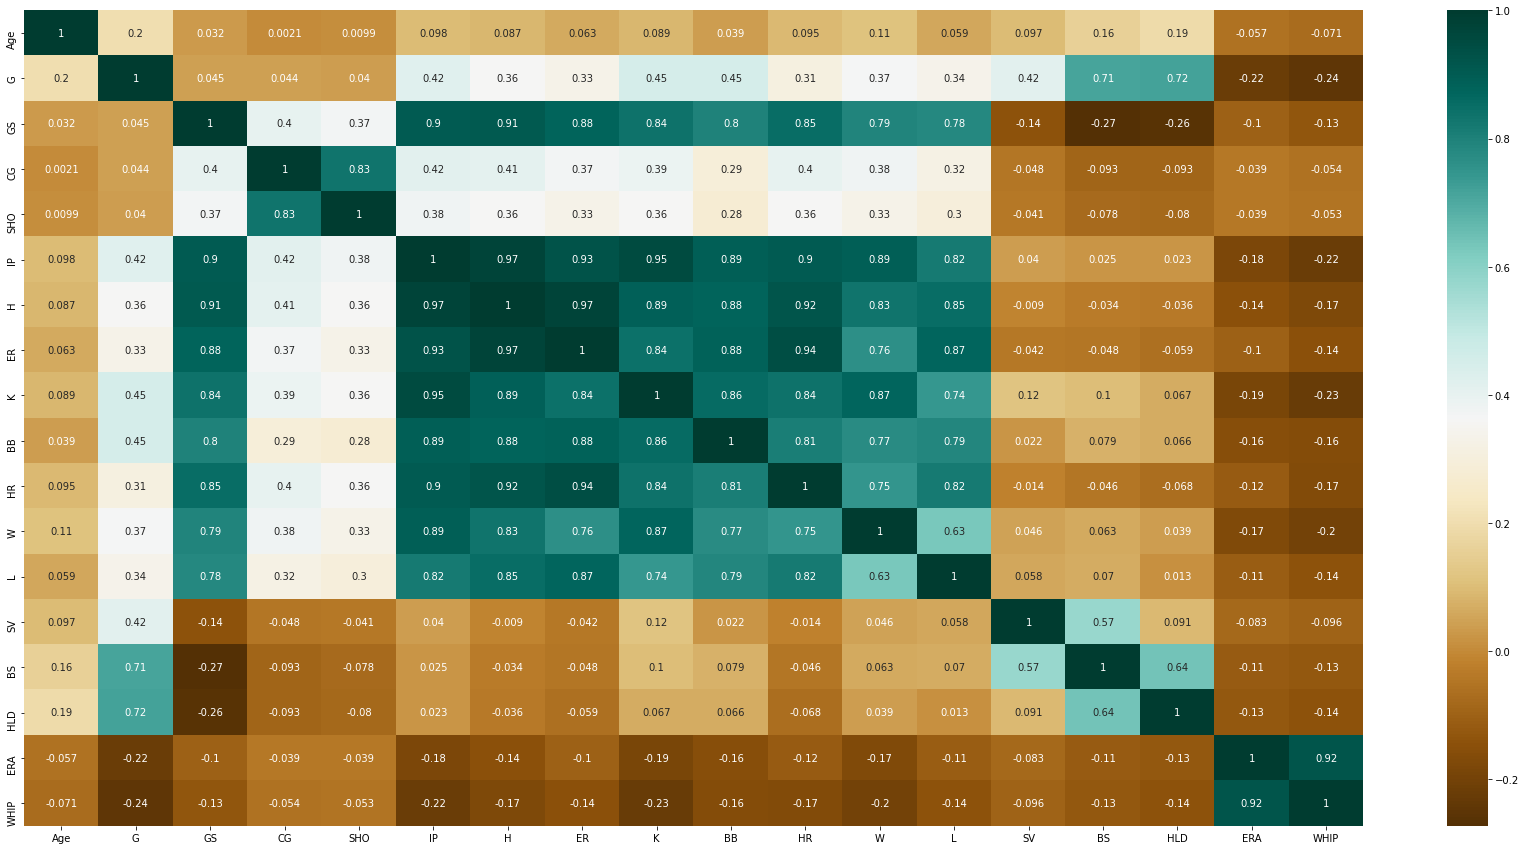

In [10]:
#visualizing the correlation matrix
plt.figure(figsize=(30,15))
sns.heatmap(c,cmap="BrBG", annot=True)

In [11]:
# Getting Features that have a correlation of greater than 0.5 for model building
selected_features = []
for i in range(len(c_pitch['W'])):
  if c_pitch['W'].values[i] >= 0.5 and c_pitch['W'].values[i] != 1.0:
    selected_features.append(c_pitch['W'].index[i])
  
selected_features

['GS', 'IP', 'H', 'ER', 'K', 'BB', 'HR', 'L']

In [12]:
#Required Imports
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor

In [15]:
X_ = df_pitch[selected_features]
y_ = df_pitch.W

In [16]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_,test_size = .20)

In [17]:
# Linear Regression Pipeline
lr = Pipeline(steps=[('LinReg', LinearRegression())])
lr.fit(X_train_, y_train_)

lr_preds_ = lr.predict(X_test_)
print(f'Linear Regression model R2 score:  {r2_score(y_test_, lr_preds_)}')

Linear Regression model R2 score:  0.8322624110249282


In [19]:
#Hyperparameter optimization for DecisionTreeRegressor
parameters_ = {
    'max_depth':[15,20,30],
}
dtc_ = Pipeline(steps=[('CV',GridSearchCV(DecisionTreeRegressor(), parameters_, cv = 5))])
dtc_.fit(X_train_, y_train_)
dtc_.named_steps['CV'].best_params_

{'max_depth': 20}

In [21]:
# DecisionTrees pipeline 
dt_ = Pipeline(steps=[('LogReg', DecisionTreeRegressor(max_depth=20))])
dt_.fit(X_train_,y_train_)
dt_preds_ = dt_.predict(X_test_)
print(f'Decision Trees model R2 score:  {r2_score(y_test_, dt_preds_)}')

Decision Trees model R2 score:  0.7820917429575137


In [22]:
# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[6,12,15,20],
    'n_estimators':[20,30]
}
rfc = Pipeline([('CV',GridSearchCV(RandomForestRegressor(), parameters, cv = 5))])
rfc.fit(X_train_, y_train_)
rfc.named_steps['CV'].best_params_

{'max_depth': 6, 'n_estimators': 30}

In [23]:
# RandomForestTrees pipeline 
rf = Pipeline(steps=[('LogReg', RandomForestRegressor(max_depth=6,n_estimators=30))])
rf.fit(X_train_,y_train_)
rf_preds = rf.predict(X_test_)
print(f'Random Forest model R2 score:  {r2_score(y_test_,rf_preds)}')

Random Forest model R2 score:  0.8146258895986472


In [27]:
y_pred = lr.predict(X_)

In [28]:
predictions_df = pd.DataFrame({'Real W':df_pitch.W, 'Predicted W':y_pred})

In [29]:
predictions_df.head()

,Real W,Predicted W
Player,,
Justin Verlander,21,16.898626
Shane Bieber,15,15.513517
Gerrit Cole,20,17.003826
Stephen Strasburg,18,15.582059
Mike Minor,14,13.750558


---

### 2020 Pitching Predictions

In [71]:
#Read in new Data
df = pd.read_csv('./mlb-pitching-2020.csv', index_col='Player')
df.head()
df = df.drop(['Team'], axis=1)
df.head()

,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
Player,,,,,,,,,,,,,,,,,,
Dylan Bundy,27,4,4,1,0,28.2,15,5,35,3,2,3,1,0,0,0,1.57,0.63
Shane Bieber,25,4,4,0,0,27.2,16,5,43,5,4,3,0,0,0,0,1.63,0.76
German Marquez,25,4,4,0,0,26.0,18,6,27,6,2,2,2,0,0,0,2.08,0.92
Kyle Freeland,27,4,4,0,0,25.2,21,7,13,7,4,2,0,0,0,0,2.45,1.09
Sonny Gray,30,4,4,0,0,24.0,14,6,35,8,2,3,1,0,0,0,2.25,0.92


In [76]:
# List of Features that will help test the model
features = ['GS', 'IP', 'H', 'ER', 'K', 'BB', 'HR', 'L']

c = df.corr()
selected_features = []
for i in range(len(c['W'])):
  if c['W'].values[i] >= 0.5 and c['W'].values[i] != 1.0:
    selected_features.append(c['W'].index[i])
  
selected_features

['IP', 'K']

In [77]:
# Creating X and y
X = df[features]
y = df.W

In [84]:
#This is a single test from 2016 stats - Justin Verlander
fake_test = pd.DataFrame({
    'GS':34,
    'IP':223.0,
    'H':137,
    'ER':64,
    'K':300,
    'BB':42,
    'HR':36,
    'L':6
}, index=[0])
fake_test.head()

,GS,IP,H,ER,K,BB,HR,L
0,34,223.0,137,64,300,42,36,6


In [88]:
# Load in Model
loaded_model = pickle.load(open('./lr_pitching_model.sav', 'rb'))

In [89]:
#Making predictions
y_pred = loaded_model.predict(X)

# Quick Predictions to see if our model is any good because the 2020 data is very sparse at the moment
fake_pred = loaded_model.predict(fake_test)

# He was accreddited 20 wins for the 2016 season
print(f"Accual wins: 20, Predicted Wins: {fake_pred}")

Accual wins: 20, Predicted Wins: [16.89862621]


In [90]:
# Getting r2 score
r2_score(y, y_pred)

0.3278246224887451

In [91]:
# Making new DataFrame with real era and predicted era
df_tested = pd.DataFrame({'Real W':y, 'Predicted W':y_pred})

In [92]:
df_tested.head()

,Real W,Predicted W
Player,,
Dylan Bundy,3,2.141979
Shane Bieber,3,2.243363
German Marquez,2,1.629676
Kyle Freeland,2,1.776226
Sonny Gray,3,1.713385


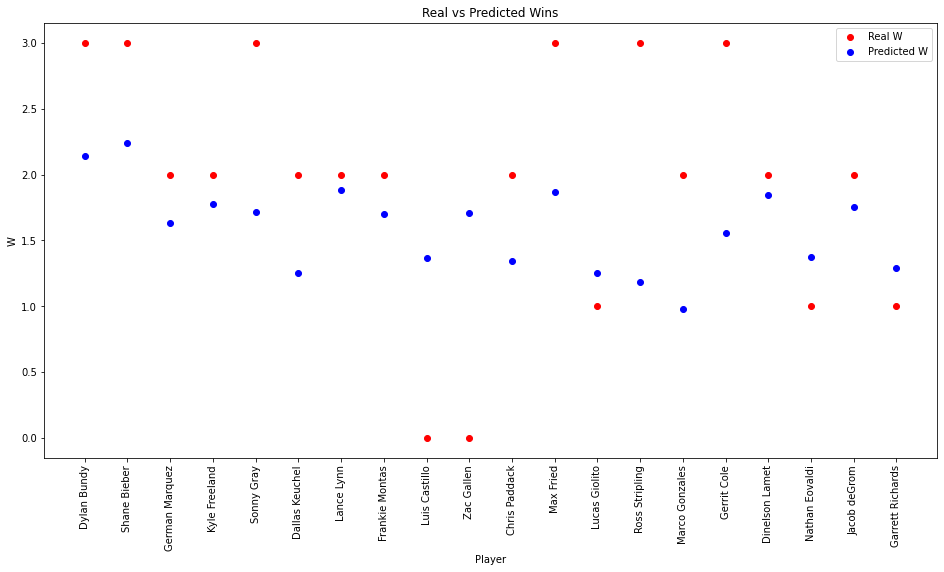

In [93]:
# Plot out test data vs predicted
plt.figure(figsize=(16,8))
plt.title('Real vs Predicted Wins')
plt.scatter(df_tested.index[:20], df_tested['Real W'][:20], color='r')
plt.scatter(df_tested.index[:20], df_tested['Predicted W'][:20], color='blue')
plt.ylabel('W')
plt.xlabel('Player')
plt.xticks(rotation=90)
plt.legend(['Real W', 'Predicted W'])

---

# Final End of Season Statistical Predictions

In [94]:
# Bringing in the predictions
lr_hitting_df = pd.read_csv('lr_hitting_predictions.csv', index_col='Player')
ridge_hitting_df = pd.read_csv('ridge_hitting_predictions.csv', index_col='Player')
pitching_df = pd.read_csv('pitching_predictions.csv', index_col='Player')

In [95]:
# LR Hitting
lr_hitting_df.head()

,Test Data,LR Predictions
Player,,
Marcus Semien,0.205,0.179911
Jose Abreu,0.276,0.247535
Jose Altuve,0.187,0.189176
Salvador Perez,0.311,0.274311
Ketel Marte,0.329,0.276391


In [96]:
#Ridge Hitting
ridge_hitting_df.head()

,Test Data,Ridge Predictions
Player,,
Marcus Semien,0.205,0.178495
Jose Abreu,0.276,0.247483
Jose Altuve,0.187,0.187987
Salvador Perez,0.311,0.274020
Ketel Marte,0.329,0.272489


In [97]:
# Pitching Preds
pitching_df.head()

,Real W,Predicted W
Player,,
Dylan Bundy,3,2.073079
Shane Bieber,3,2.587359
German Marquez,2,2.004976
Kyle Freeland,2,1.755144
Sonny Gray,3,1.903647


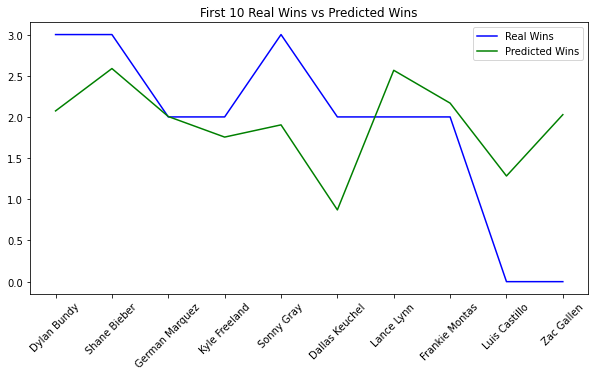

In [98]:
# Plotting out accuracy of pitching predictions
plt.figure(figsize=(10,5))
plt.title("First 10 Real Wins vs Predicted Wins")
plt.plot(pitching_df.index[:10], pitching_df['Real W'][:10], color='b')
plt.plot(pitching_df.index[:10], pitching_df['Predicted W'][:10], color='g')
plt.xticks(rotation=45)
plt.legend(['Real Wins', 'Predicted Wins'])
plt.show()

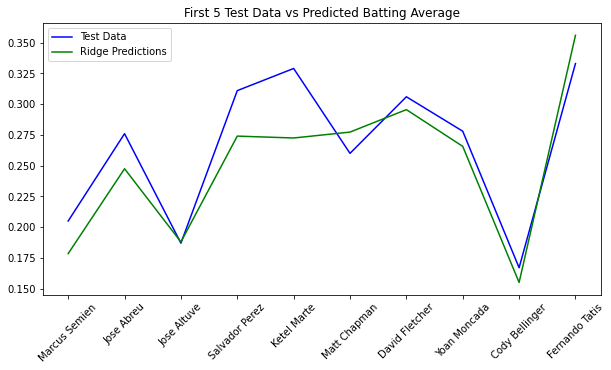

In [99]:
# Plotting out Accuracy of RidgeRegressor Predictions for hitting
plt.figure(figsize=(10,5))
plt.title("First 5 Test Data vs Predicted Batting Average")
plt.plot(ridge_hitting_df.index[:10], ridge_hitting_df['Test Data'][:10], color='b')
plt.plot(ridge_hitting_df.index[:10], ridge_hitting_df['Ridge Predictions'][:10], color='g')
plt.xticks(rotation=45)
plt.legend(['Test Data', 'Ridge Predictions'])
plt.show()

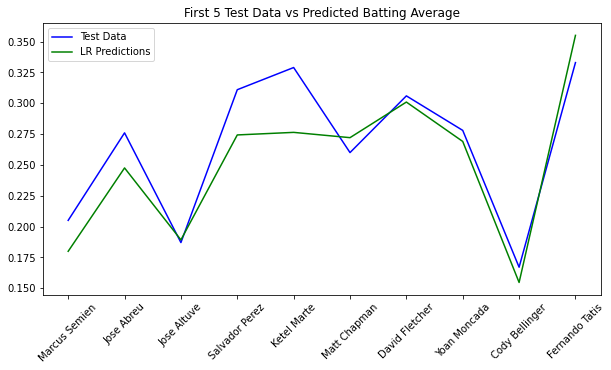

In [100]:
# Plotting out Accuracy of LinearRegressor Predictions for hitting
plt.figure(figsize=(10,5))
plt.title("First 5 Test Data vs Predicted Batting Average")
plt.plot(lr_hitting_df.index[:10], lr_hitting_df['Test Data'][:10], color='b')
plt.plot(lr_hitting_df.index[:10], lr_hitting_df['LR Predictions'][:10], color='g')
plt.xticks(rotation=45)
plt.legend(['Test Data', 'LR Predictions'])
plt.show()

In [101]:
# Calculate xBA based on total 2020 games and number of games played 
def calc_xba(ba):
  if ba < 1.0: 
    return (ba / 18) * 60 - ba * 2
  else:
    return ba

In [102]:
# Apply function from above
ridge_hitting_df['xBA'] = ridge_hitting_df['Ridge Predictions'].apply(calc_xba)

In [103]:
ridge_hitting_df.head()

,Test Data,Ridge Predictions,xBA
Player,,,
Marcus Semien,0.205,0.178495,0.237993
Jose Abreu,0.276,0.247483,0.329978
Jose Altuve,0.187,0.187987,0.250649
Salvador Perez,0.311,0.274020,0.365360
Ketel Marte,0.329,0.272489,0.363319


In [104]:
# Function to calculate Expected Pitcher Wins
def calc_xW(w): 
  if w != 0:
    return ((w / 18) * 60) * 2.25
  else:
    return 0

In [105]:
# Apply function from above
pitching_df['xW'] = pitching_df['Real W'].apply(calc_xW)

In [106]:
pitching_df.head()

,Real W,Predicted W,xW
Player,,,
Dylan Bundy,3,2.073079,22.5
Shane Bieber,3,2.587359,22.5
German Marquez,2,2.004976,15.0
Kyle Freeland,2,1.755144,15.0
Sonny Gray,3,1.903647,22.5


In [107]:
# Rename some columns
pitching_df = pitching_df.rename(columns={'Real W':'Current Wins', 'Predicted W':'Predicted Wins', 'xW':'Current Predicted Wins (EOS)'})
ridge_hitting_df = ridge_hitting_df.rename(columns={'Test Data':'Current BA', 'Ridge Predictions':'BA Prediction', 'xBA':'Expected BA (EOS)'})

In [108]:
ridge_hitting_df.head()

,Current BA,BA Prediction,Expected BA (EOS)
Player,,,
Marcus Semien,0.205,0.178495,0.237993
Jose Abreu,0.276,0.247483,0.329978
Jose Altuve,0.187,0.187987,0.250649
Salvador Perez,0.311,0.274020,0.365360
Ketel Marte,0.329,0.272489,0.363319


In [109]:
pitching_df.head()

,Current Wins,Predicted Wins,Current Predicted Wins (EOS)
Player,,,
Dylan Bundy,3,2.073079,22.5
Shane Bieber,3,2.587359,22.5
German Marquez,2,2.004976,15.0
Kyle Freeland,2,1.755144,15.0
Sonny Gray,3,1.903647,22.5


---

# Findings

The 2020 MLB season and the players stats will be heavily effected by lack of games that will be played (60 total games). With this unexpected hitch in the 2020 season it makes it difficult to make time series predictions on the entire season. For this reason I had to use some math to predict the xBA (Expected Batting Averrage), and xW (Expected Pitching Wins). When using this math there is an upper limit of the accuracy.